# Optimal solution for the 3x3x3 Rubik's Cube

<img src="https://w7.pngwing.com/pngs/754/347/png-transparent-3-by-3-rubik-s-cube-rubiks-cube-professors-cube-rubik-039-s-cube-symmetry-cube-toy-thumbnail.png"/>

## Defining all possible moves

<img src="https://uploads-ssl.webflow.com/621fc3d35d2503efbb52fe84/621fc3d35d25030ff3530054_twisting.jpeg"/>

* R - right side up,
* Ri - right side down,
* L - left side down,
* Li - left side up,
* B - back side left,
* Bi - back side right,
* F - front side right,
* Fi - front side left,
* D - bottom side right,
* Di - bottom side left,
* U - top side left,
* Ui - top side right

So in total we can make 12 moves for 3x3x3 rubik's cube.


### Color codes
* 1 - green
* 2 - blue
* 3 - red
* 4 - orange
* 5 - yellow
* 6 - white

In [ ]:
!pip install pygad
!pip install pyswarms

In [148]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history
import pygad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

2023-04-12 06:05:20,535 - numexpr.utils - INFO - NumExpr defaulting to 2 threads.


In [115]:
# Define a list of possible moves
MOVES = np.array(["U", "U'", "D", "D'", "R", "R'", "L", "L'", "F", "F'", "B", "B'"])

In [116]:
# Define a function to initialize a solved rubik's cube

def initialize_cube():
  """
  Initializes numpy representation of solved Rubik's cube.

  Returns:
    A numpy array of shape (6, 3, 3) with each
    consecutive (3, 3) sized array filled with index + 1 numbers
    representing different colours.
  """
  cube = np.zeros((6, 3, 3), dtype=np.int8)

  # Front face - green
  cube[0] = np.full((3, 3), 1)

  # Back face - blue
  cube[1] = np.full((3, 3), 2)

  # Left face - red
  cube[2] = np.full((3, 3), 3)

  # Right face - orange
  cube[3] = np.full((3, 3), 4)

  # Top face - yellow
  cube[4] = np.full((3, 3), 5)

  # Bottom face - white
  cube[5] = np.full((3, 3), 6)

  return cube

In [117]:
# Define the colours of each face, indices and colour palette
colours = ['green', 'blue', 'red', 'orange', 'yellow', 'white']

# Front face cube[0]
# Back face  cube[1]
# Left face cube[2]
# Right face cube[3]
# Top face cube[4]
# Bottom face cube[5]

cube_sides = {"front": 0, 
              "back": 1, 
              "left": 2, 
              "right": 3, 
              "top": 4, 
              "bottom": 5}

colour_palette = {
    'blue': [0, 0, 255],
    'green': [0, 255, 0],  # green
    'red': [255, 0, 0],  # red
    'orange': [255, 153, 51],  # orange
    'white': [255, 255, 255],  # white
    'yellow': [255, 255, 0],  # yellow
}

In [118]:
def plot_cube_side(cube, sides, axes):
  """
  Plots a single side of a Rubik's cube on an axis.

  Args:
    cube: an ndarray of size (6, 3, 3) representing Rubik's cube,
    sides: an ndarray with list of sides to be consecutively plotted
    axes: an ndarray of axes of size = len(sides) to plot Rubik's cube sides on
  """
  if len(sides) == 1:
    # Set the title of the plot
    axes.set_title(sides[0])

    x = np.arange(0, 3)
    y = np.arange(0, 3)

    # Draw the vertical and horizontal lines of the mesh
    axes.hlines(y + 0.5, xmin=-0.5, xmax=2.5, color='black', linewidth=1)
    axes.vlines(x + 0.5, ymin=-0.5, ymax=2.5, color='black', linewidth=1)
    
    # Convert the numpy array for the current face to a list of colors
    side = np.array([])
    for row in range(3):
        for col in range(3):
            colour = colour_palette[colours[cube[cube_sides[sides[0]]][row][col] - 1]]
            side = np.append(side, colour)
    
    # Reshape the list of colors into a 3x3 image and plot it
    axes.imshow(side.reshape(3, 3, 3) / 255.)

    # Hide the axis ticks and labels
    axes.set_xticks([])
    axes.set_yticks([])
  else:
    for i, ax in enumerate(axes):
      # Set the title of the subplot to the name of the corresponding face
      ax.set_title(sides[i])

      x = np.arange(0, 3)
      y = np.arange(0, 3)

      # Draw the vertical and horizontal lines of the mesh
      ax.hlines(y + 0.5, xmin=-0.5, xmax=2.5, color='black', linewidth=1)
      ax.vlines(x + 0.5, ymin=-0.5, ymax=2.5, color='black', linewidth=1)
      
      # Convert the numpy array for the current face to a list of colors
      side = np.array([])
      for row in range(3):
          for col in range(3):
              colour = colour_palette[colours[cube[cube_sides[sides[i]]][row][col] - 1]]
              side = np.append(side, colour)
      
      # Reshape the list of colors into a 3x3 image and plot it
      ax.imshow(side.reshape(3, 3, 3) / 255.)

      # Hide the axis ticks and labels
      ax.set_xticks([])
      ax.set_yticks([])


In [119]:
def plot_cube(cube, size=3):
  """
  Plots a Rubik's cube in a way as it was to be unfolded.
  The back side is presented upside down.

  Args:
    cube: an ndarray representing Rubik's cube
    size: size of Rubik's cube (default = 3)
  """
  plt.rcParams['font.size'] = 12

  fig, axes = plt.subplots(nrows=4, ncols=size, figsize=(6, 8))
  plot_cube_side(cube, ['top'], axes=axes[0, 1])
  plot_cube_side(cube, ['left', 'front', 'right'], axes=axes[1])
  plot_cube_side(cube, ['bottom'], axes=axes[2, 1])
  plot_cube_side(cube, ['back'], axes=axes[3, 1])

  axes[0, 0].set_axis_off()
  axes[0, 2].set_axis_off()
  axes[2, 0].set_axis_off()
  axes[2, 2].set_axis_off()
  axes[3, 0].set_axis_off()
  axes[3, 2].set_axis_off()

  plt.show();

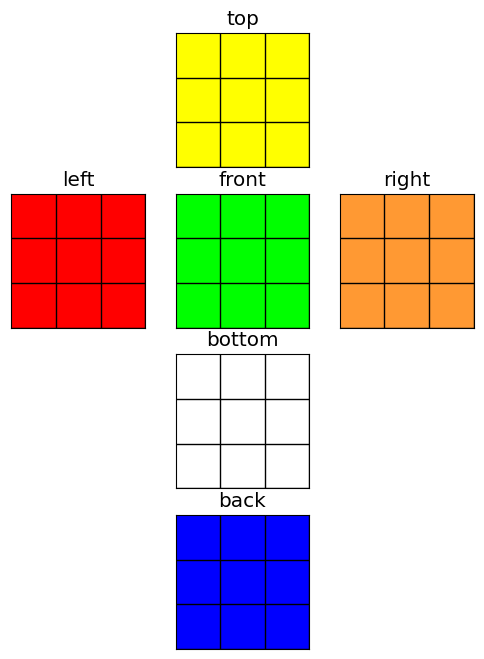

In [120]:
# Plot initialized Rubik's cube
cube = initialize_cube()
plot_cube(cube)

In [121]:
def make_move(cube, move):
  """
  Swaps rows, and columns and rotates ndarrays in order to resemble Rubik's 
  cube moves

  Args:
    cube: an ndarray representing Rubik's cube
    move: a string representation of a move
      (Possible moves: U, U', D, D', R, R', L, L', F, F', B, B')

  Returns:
    a (6, 3, 3) shaped array with applied transformation
  """
  if move == "F":
    cube[0] = np.rot90(cube[0], k=-1) # rotate front face clockwise
    tmp = np.copy(cube[4, -1]) # last top row
    cube[4, -1] = np.flip(cube[2, :, -1]) # change last top row to last left column
    cube[2, :, -1] = cube[5, 0] # change last left column to first bottom row
    cube[5, 0] = np.flip(cube[3, :, 0]) # change first bottom row to first right column
    cube[3, :, 0] = tmp # change first right column to top last row
  elif move == "F'":
    cube[0] = np.rot90(cube[0], k=1) # rotate front face counter clockwise
    tmp = np.copy(cube[4, -1]) # last top row
    cube[4, -1] = cube[3, :, 0] # change last top row to first right column
    cube[3, :, 0] = np.flip(cube[5, 0]) # change first right column to first bottom row
    cube[5, 0] = cube[2, :, -1] # change first bottom row to last left column
    cube[2, :, -1] = np.flip(tmp) # change last left column to top last row
  elif move == "D":
    cube[5] = np.rot90(cube[5], k=-1) # rotate bottom face clockwise
    tmp = np.copy(cube[0, -1]) # last front row
    cube[0, -1] = cube[2, -1] # last front row to last left row
    cube[2, -1] = cube[1, 0] # last left row to first back row
    cube[1, 0] = np.flip(cube[3, -1]) # first back row to last right row
    cube[3, -1] = tmp # last right row to last front row
  elif move == "D'":
    cube[5] = np.rot90(cube[5], k=1) # rotate bottom face counter clockwise
    tmp = np.copy(cube[0, -1]) # last front row
    cube[0, -1] = cube[3, -1] # last front row to last right row
    cube[3, -1] = cube[1, 0] # first right row to last back row
    cube[1, 0] = np.flip(cube[2, -1]) # first back row to last left row
    cube[2, -1] = tmp # last left row to last front row
  elif move == "U'":
    cube[4] = np.rot90(cube[4], k=1)# rotate top face counter clockwise
    tmp = np.copy(cube[0, 0]) # top front row
    cube[0, 0] = cube[2, 0] # first front row to first left row
    cube[2, 0] = np.flip(cube[1, -1]) # first left row to last back row
    cube[1, -1] = np.flip(cube[3, 0]) # last back row to first right row
    cube[3, 0] = tmp # first right row to first front row
  elif move == "U":
    cube[4] = np.rot90(cube[4], k=-1)# rotate top face clockwise
    tmp = np.copy(cube[0, 0]) # top front row
    cube[0, 0] = cube[3, 0] # first front row to first right row
    cube[3, 0] = np.flip(cube[1, -1]) # first right row to last back row
    cube[1, -1] = np.flip(cube[2, 0]) # last back row to first left row
    cube[2, 0] = tmp # first left row to first front row
  elif move == "B'":
    cube[1] = np.rot90(cube[1], k=1)# rotate back face counter clockwise
    tmp = np.copy(cube[4, 0]) # first top row
    cube[4, 0] = np.flip(cube[2, :, 0]) # first top row to first left column
    cube[2, :, 0] = cube[5, -1] # first left column to last bottom row
    cube[5, -1] = np.flip(cube[3, :, -1]) # last bottom row to last right column
    cube[3, :, -1] = tmp # last right column to first top row
  elif move == "B":
    cube[1] = np.rot90(cube[1], k=-1)# rotate back face clockwise
    tmp = np.copy(cube[4, 0]) # first top row
    cube[4, 0] = cube[3, :, -1] # first top row to last right column
    cube[3, :, -1] = np.flip(cube[5, -1]) # last right column to last bottom row
    cube[5, -1] = cube[2, :, 0] # last bottom row to first left column
    cube[2, :, 0] = np.flip(tmp) # first left column to first top row
  elif move == "R":
    cube[3] = np.rot90(cube[3], k=-1) # rotate right face clockwise
    tmp = np.copy(cube[4, :, -1]) # last top column
    cube[4, :, -1] = cube[0, :, -1] # last top column to last front column
    cube[0, :, -1] = cube[5, :, -1] # last front column to last bottom column
    cube[5, :, -1] = cube[1, :, -1] # last bottom column to last back column
    cube[1, :, -1] = tmp # last back column to last top column
  elif move == "R'":
    cube[3] = np.rot90(cube[3], k=1) # rotate right face counter clockwise
    tmp = np.copy(cube[4, :, -1]) # last top column
    cube[4, :, -1] = cube[1, :, -1] # last top column to last back column
    cube[1, :, -1] = cube[5, :, -1] # last back column to last bottom column
    cube[5, :, -1] = cube[0, :, -1] # last bottom column to last front column
    cube[0, :, -1] = tmp # last front column to last top column
  elif move == "L":
    cube[2] = np.rot90(cube[2], k=-1) # rotate left face clockwise
    tmp = np.copy(cube[4, :, 0]) # first top column
    cube[4, :, 0] = cube[1, :, 0] # first top column to first back column
    cube[1, :, 0] = cube[5, :, 0] # first back column to first bottom column
    cube[5, :, 0] = cube[0, :, 0] # first bottom column to first front column
    cube[0, :, 0] = tmp # first front column to first top column
  elif move == "L'":
    cube[2] = np.rot90(cube[2], k=1) # rotate left face counter clockwise
    tmp = np.copy(cube[4, :, 0]) # first top column
    cube[4, :, 0] = cube[0, :, 0] # first top column to first front column
    cube[0, :, 0] = cube[5, :, 0] # first front column to first bottom column
    cube[5, :, 0] = cube[1, :, 0] # first bottom column to first back column
    cube[1, :, 0] = tmp # first back column to first top column

  return cube

In [122]:
def shuffle_cube(n_moves, cube):
  """
  Randomly shuffles the Rubik's cube using the make_move() function.
  For each move in range(n_moves) the function selects random move
  and applies it to a Rubik's cube representation.

  Args:
    n_moves: number of random moves
    cube: an ndarray representing Rubik's cube

  Returns:
    list of commited moves, 
    a (6, 3, 3) shaped randomly shuffled array
  """
  commited_moves = []
  new_cube = np.copy(cube)

  for i in range(n_moves):
    move = np.random.choice(MOVES)
    commited_moves.append(move)
    new_cube = make_move(new_cube, move)

  return commited_moves, new_cube

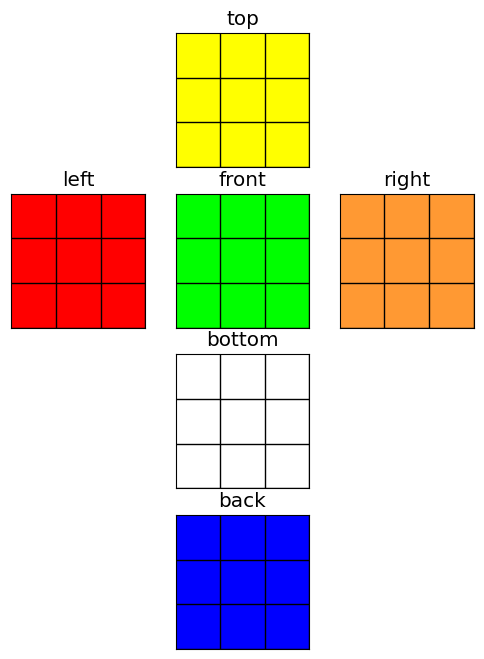

In [123]:
cube = initialize_cube()
plot_cube(cube)

## Let's make experiments on different number of moves used to shuffle the solved Rubik's cube

1. Small input - 5 moves
2. Medium input - 10 moves
3. Big input - 20 moves

In [ ]:
# Define the DataFrame to compare results
results = pd.DataFrame(columns=["n_shuffle_moves", "percent_of_good_solutions", "avg_runtime"])

results

Since cubies in the middle always stay the same during shuffling and moving sides we compare the whole side to the middle cubie to check if all other cubies are properly aligned to their *initial* side

In [126]:
# Define fitness function for our genetic algorithm
def fitness_function(instance, solution, solution_idx):
  cube_copy = np.copy(shuffled_cube)
  fitness = 0

  # Commit moves on the shuffled Rubik's cube to check
  # whether they are valid to solve the cube
  for i in range(len(solution)):
    cube_copy = make_move(cube_copy, MOVES[int(solution[i])])

    # if after any of the moves the cube is solved, return the fitness score
    if np.sum(cube_copy == cube) == 54:
      return 54 * (num_genes - i)

  # After all the moves count how many elements on each face
  # are aligned properly to calculate fitness score
  for j in range(len(cube_copy)):
    score = cube_copy[j] == cube_copy[j, 1, 1]
    fitness += np.sum(score)

  return fitness

In [132]:
# Define function to calculate the cost of the moves for PSO
def calculate_accuracy(solution):
  cube_copy = np.copy(shuffled_cube)
  fitness = 0

  for i in range(len(solution)):
    cube_copy = make_move(cube_copy, MOVES[int(np.round(solution[i]))])
  
  for i in range(len(cube_copy)):
    score = cube_copy[i] == cube_copy[i, 1, 1]
    fitness += np.sum(score)

  # 1 - Rubik's cube solved, higher - unsolved
  return 54. / fitness

In [133]:
# Define a function to calculate cost for each of the particles for PSO
def f(x):
  n_particles = x.shape[0]
  results = np.array([calculate_accuracy(x[i]) for i in range(n_particles)])

  return results

### Small input

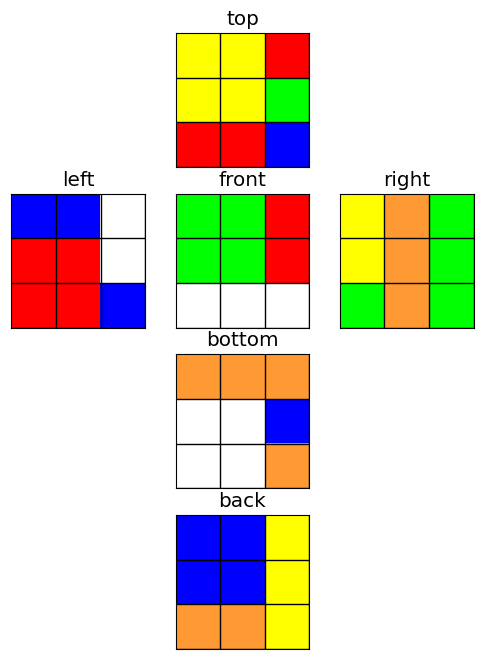

["U'", 'R', 'F', 'L', "L'"]


In [150]:
# Shuffle the Rubik's cube and plot it
n_moves_small = 5
cube = initialize_cube()
commited_moves, shuffled_cube = shuffle_cube(n_moves_small, cube)

plot_cube(shuffled_cube)
print(commited_moves)

In [174]:
# Initialize Genetic Algorithm hyperparameters
gene_space = np.arange(0, len(MOVES), 1)

sol_per_pop = 100
num_genes = n_moves_small 

num_parents_mating = 50
num_generations = 100
keep_parents = 10

#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "tournament"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 20

In [157]:
# Initialize genetic algorithm and run it
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria="reach_54")

ga_instance.run()

In [158]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

n_solution_moves = len(solution) 

if solution_fitness > 54:
  n_solution_moves = int(len(solution) - (solution_fitness / 54))

no_generations = ga_instance.generations_completed
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Generations before finding the best solution = {no_generations}".format(no_generations=no_generations))

Parameters of the best solution : [9. 5. 1. 1. 1.]
Fitness value of the best solution = 54
Generations before finding the best solution = 2


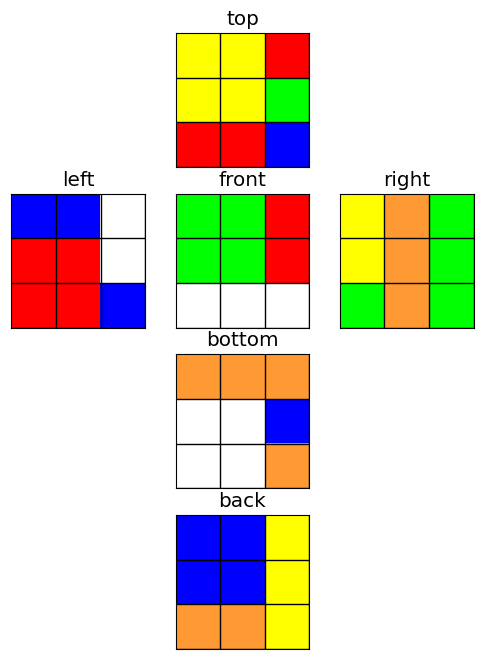

In [159]:
# Plot the shuffled cube to remind ourselved of the cube
plot_cube(shuffled_cube)

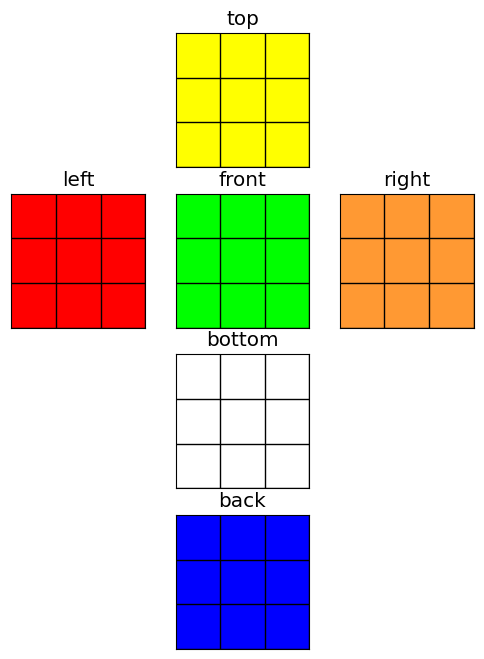

In [160]:
# Visualize moves from the best solution commited on the shuffled cube
new_cube = np.copy(shuffled_cube)

for i in range(n_solution_moves):
  new_cube = make_move(new_cube, MOVES[int(solution[i])])

plot_cube(new_cube)

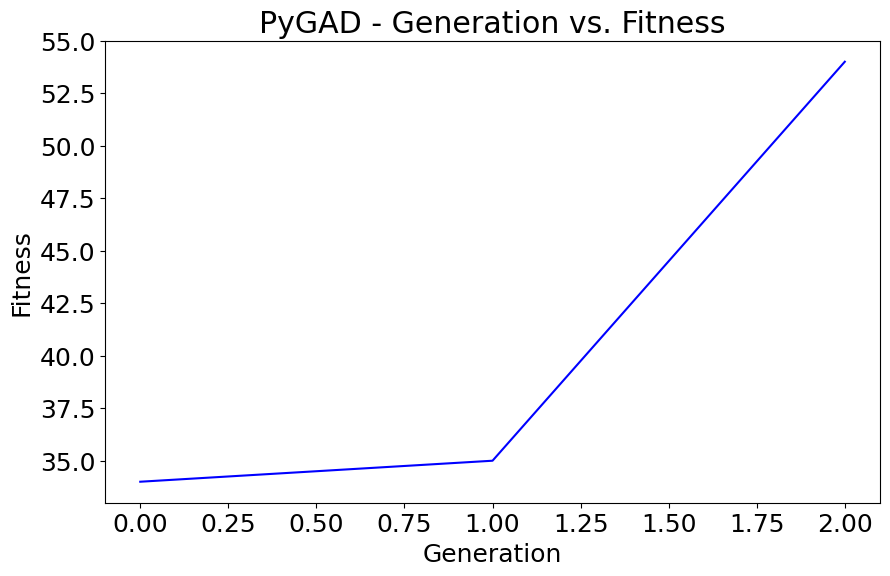

In [161]:
# Check the fitness curve
plt.rcParams['font.size'] = 18

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(ga_instance.best_solutions_fitness,
        c="b")

ax.set(title="PyGAD - Generation vs. Fitness", 
       xlabel="Generation", 
       ylabel="Fitness");

### Small inputs - GA

In [ ]:
elapsed_times = []

n_moves_small = 5
n_good_solutions = 0

for i in range(100):
  # Shuffle the Rubik's cube
  cube = initialize_cube()
  commited_moves, shuffled_cube = shuffle_cube(n_moves_small, cube)

  start_time = time.time()

  # Initialize genetic algorithm and run it
  ga_instance = pygad.GA(gene_space=gene_space,
                         num_generations=num_generations,
                         num_parents_mating=num_parents_mating,
                         fitness_func=fitness_function,
                         sol_per_pop=sol_per_pop,
                         num_genes=n_moves_small,
                         parent_selection_type=parent_selection_type,
                         keep_parents=keep_parents,
                         crossover_type=crossover_type,
                         mutation_type=mutation_type,
                         mutation_percent_genes=mutation_percent_genes,
                         stop_criteria="reach_54")

  ga_instance.run()

  end_time = time.time()
  elapsed_times.append(end_time - start_time)

  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  if solution_fitness >= 54:
    n_good_solutions += 1

small_input_results = {"n_shuffle_moves": 5, 
                       "percent_of_good_solutions": n_good_solutions / 100,
                       "avg_runtime": np.mean(elapsed_times)}

results = results.append(small_input_results, ignore_index=True)

### Medium inputs - GA

In [ ]:
elapsed_times = []

n_moves_medium = 10
n_good_solutions = 0

for i in range(100):
  # Shuffle the Rubik's cube
  cube = initialize_cube()
  commited_moves, shuffled_cube = shuffle_cube(n_moves_small, cube)

  start_time = time.time()

  # Initialize genetic algorithm and run it
  ga_instance = pygad.GA(gene_space=gene_space,
                         num_generations=num_generations,
                         num_parents_mating=num_parents_mating,
                         fitness_func=fitness_function,
                         sol_per_pop=sol_per_pop,
                         num_genes=n_moves_medium,
                         parent_selection_type=parent_selection_type,
                         keep_parents=keep_parents,
                         crossover_type=crossover_type,
                         mutation_type=mutation_type,
                         mutation_percent_genes=mutation_percent_genes,
                         stop_criteria="reach_54")

  ga_instance.run()

  end_time = time.time()
  elapsed_times.append(end_time - start_time)

  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  if solution_fitness >= 54:
    n_good_solutions += 1

medium_input_results = {"n_shuffle_moves": 10, 
                       "percent_of_good_solutions": n_good_solutions / 100,
                       "avg_runtime": np.mean(elapsed_times)}

results = results.append(medium_input_results, ignore_index=True)

### Big inputs - GA

In [ ]:
elapsed_times = []

n_moves_big = 20
n_good_solutions = 0

for i in range(100):
  # Shuffle the Rubik's cube
  cube = initialize_cube()
  commited_moves, shuffled_cube = shuffle_cube(n_moves_big, cube)

  start_time = time.time()

  # Initialize genetic algorithm and run it
  ga_instance = pygad.GA(gene_space=gene_space,
                         num_generations=num_generations,
                         num_parents_mating=num_parents_mating,
                         fitness_func=fitness_function,
                         sol_per_pop=sol_per_pop,
                         num_genes=n_moves_big,
                         parent_selection_type=parent_selection_type,
                         keep_parents=keep_parents,
                         crossover_type=crossover_type,
                         mutation_type=mutation_type,
                         mutation_percent_genes=mutation_percent_genes,
                         stop_criteria="reach_54")

  ga_instance.run()

  end_time = time.time()
  elapsed_times.append(end_time - start_time)

  solution, solution_fitness, solution_idx = ga_instance.best_solution()

  if solution_fitness >= 54:
    n_good_solutions += 1

big_input_results = {"n_shuffle_moves": 10, 
                       "percent_of_good_solutions": n_good_solutions / 100,
                       "avg_runtime": np.mean(elapsed_times)}

results = results.append(big_input_results, ignore_index=True)

In [186]:
results

,n_shuffle_moves,percent_of_good_solutions,avg_runtime
0,5.0,0.65,1.494241
1,10.0,0.41,3.261845
2,20.0,0.00,8.088125


## Let's try pyswarms

In [215]:
# Define the DataFrame to compare results of PSO
results_PSO = pd.DataFrame(columns=["n_shuffle_moves", "percent_of_good_solutions", "avg_runtime"])

results_PSO

,n_shuffle_moves,percent_of_good_solutions,avg_runtime


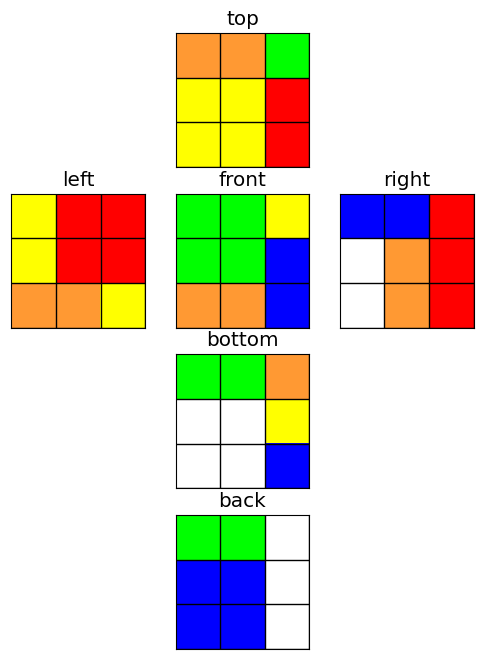

['B', "D'", "R'", "D'", "R'"]


In [188]:
# Shuffle the Rubik's cube and plot it
n_moves_small = 5
cube = initialize_cube()
commited_moves, shuffled_cube = shuffle_cube(n_moves_small, cube)

plot_cube(shuffled_cube)
print(commited_moves)

In [189]:
# Define bounds that represent min and max indices from MOVES array for PSO
bound_max = np.ones(5) * 11
bound_min = np.zeros(5)

bounds = (bound_min, bound_max)
bounds

(array([0., 0., 0., 0., 0.]), array([11., 11., 11., 11., 11.]))

In [193]:
# Set-up hyperparameters
options = {'c1': 0.8, 'c2': 0.1, 'w': 0.9}
n_particles = 100

In [194]:
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, 
                                    dimensions=5, 
                                    options=options, 
                                    bounds=bounds)

In [196]:
# Perform optimization
cost, pos = optimizer.optimize(f, iters=100)

2023-04-12 07:15:45,303 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.8, 'c2': 0.1, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.04
2023-04-12 07:15:48,041 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.0384615384615385, best pos: [ 3.82019016  2.38981553  4.19679972  2.10552029 10.56629209]


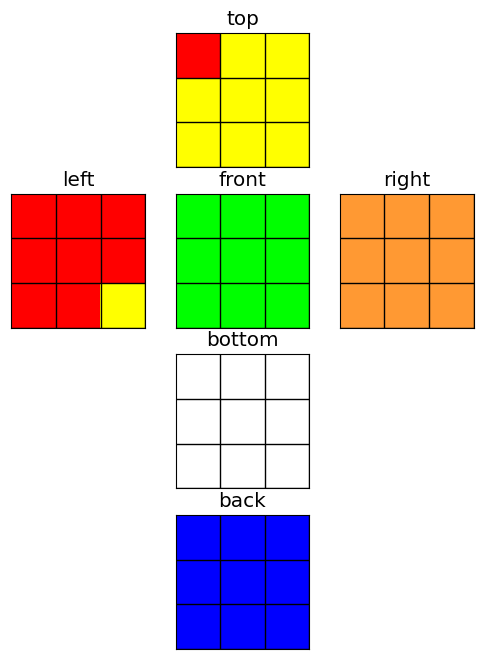

In [197]:
# Visualize the best solution from PSO
best_sol_moves = [round(move) for move in pos]

best_sol_PSO_cube = np.copy(shuffled_cube)

for move in best_sol_moves:
  best_sol_PSO_cube = make_move(best_sol_PSO_cube, MOVES[move])

plot_cube(best_sol_PSO_cube)

In [198]:
# Obtain cost history from optimizer instance
cost_history = optimizer.cost_history

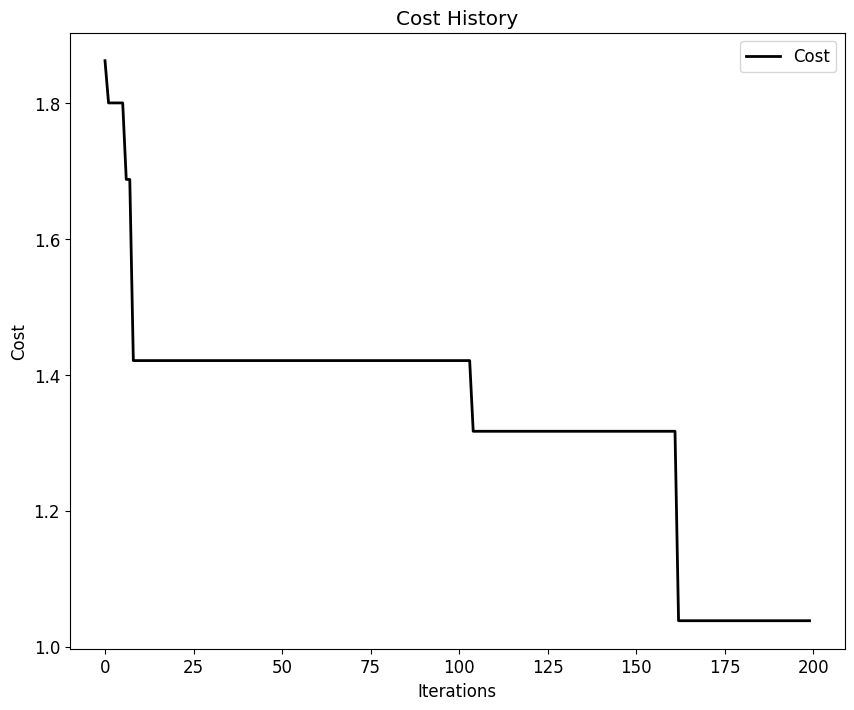

In [199]:
# Plot!
plot_cost_history(cost_history)
plt.show()

### Small inputs PSO

In [ ]:
elapsed_times = []

n_moves_small = 5
n_good_solutions = 0

for i in range(100):
  # Shuffle the Rubik's cube
  cube = initialize_cube()
  commited_moves, shuffled_cube = shuffle_cube(n_moves_small, cube)

  # Call instance of PSO
  optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, 
                                      dimensions=n_moves_small, 
                                      options=options, 
                                      bounds=bounds)

  start_time = time.time()

  # Perform optimization
  cost, pos = optimizer.optimize(f, iters=100);

  end_time = time.time()
  elapsed_times.append(end_time - start_time)

  if cost <= 1:
    n_good_solutions += 1

small_PSO_input_results = {"n_shuffle_moves": 5, 
                           "percent_of_good_solutions": n_good_solutions / 100,
                           "avg_runtime": np.mean(elapsed_times)}

results_PSO = results_PSO.append(small_PSO_input_results, ignore_index=True)

In [208]:
results_PSO

,n_shuffle_moves,percent_of_good_solutions,avg_runtime
0,5.0,0.22,3.179703


### Medium inputs PSO

In [ ]:
elapsed_times = []

n_moves_medium = 10
n_good_solutions = 0

# Define bounds that represent min and max indices from MOVES array for PSO
bound_max = np.ones(n_moves_medium) * 11
bound_min = np.zeros(n_moves_medium)

bounds = (bound_min, bound_max)

for i in range(100):
  # Shuffle the Rubik's cube
  cube = initialize_cube()
  commited_moves, shuffled_cube = shuffle_cube(n_moves_medium, cube)

  # Call instance of PSO
  optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, 
                                      dimensions=n_moves_medium, 
                                      options=options, 
                                      bounds=bounds)

  start_time = time.time()

  # Perform optimization
  cost, pos = optimizer.optimize(f, iters=100);

  end_time = time.time()
  elapsed_times.append(end_time - start_time)

  if cost <= 1:
    n_good_solutions += 1

medium_PSO_input_results = {"n_shuffle_moves": 10, 
                           "percent_of_good_solutions": n_good_solutions / 100,
                           "avg_runtime": np.mean(elapsed_times)}

results_PSO = results_PSO.append(medium_PSO_input_results, ignore_index=True)

In [211]:
results_PSO

,n_shuffle_moves,percent_of_good_solutions,avg_runtime
0,5.0,0.22,3.179703
1,10.0,0.02,4.693503


### Big inputs PSO

In [ ]:
elapsed_times = []

n_moves_big = 20
n_good_solutions = 0

# Define bounds that represent min and max indices from MOVES array for PSO
bound_max = np.ones(n_moves_big) * 11
bound_min = np.zeros(n_moves_big)

bounds = (bound_min, bound_max)

for i in range(100):
  # Shuffle the Rubik's cube
  cube = initialize_cube()
  commited_moves, shuffled_cube = shuffle_cube(n_moves_big, cube)

  # Call instance of PSO
  optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, 
                                      dimensions=n_moves_big, 
                                      options=options, 
                                      bounds=bounds)

  start_time = time.time()

  # Perform optimization
  cost, pos = optimizer.optimize(f, iters=100);

  end_time = time.time()
  elapsed_times.append(end_time - start_time)

  if cost <= 1:
    n_good_solutions += 1

big_PSO_input_results = {"n_shuffle_moves": 20, 
                         "percent_of_good_solutions": n_good_solutions / 100,
                         "avg_runtime": np.mean(elapsed_times)}

results_PSO = results_PSO.append(big_PSO_input_results, ignore_index=True)

In [217]:
results_PSO

,n_shuffle_moves,percent_of_good_solutions,avg_runtime
0,5.0,0.22,3.179703
1,10.0,0.02,4.693503
2,20.0,0.00,7.839291


In [218]:
results

,n_shuffle_moves,percent_of_good_solutions,avg_runtime
0,5.0,0.65,1.494241
1,10.0,0.41,3.261845
2,20.0,0.00,8.088125


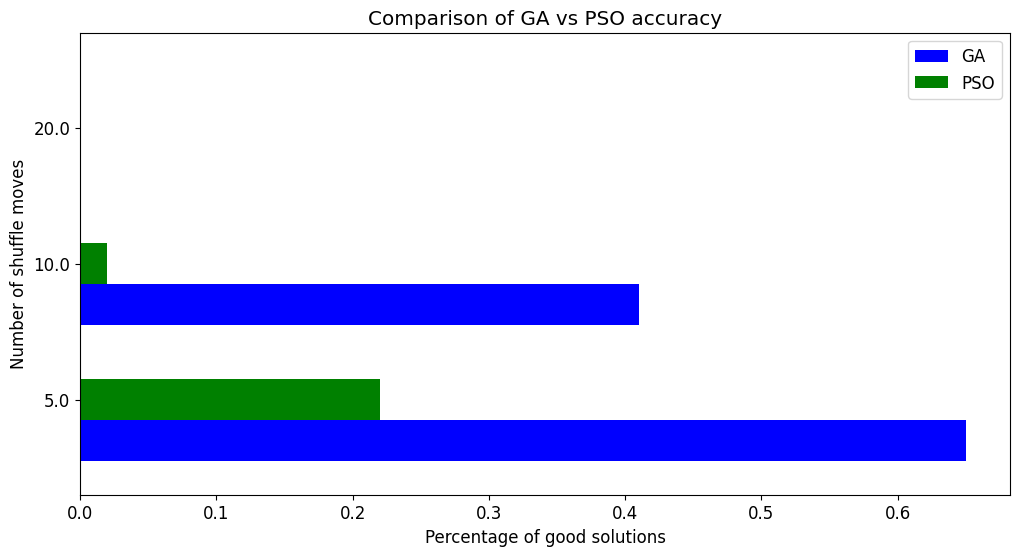

In [243]:
# Plot PSO results vs GA results
fig, ax = plt.subplots(figsize=(12, 6))

y_pos = np.arange(len(results["n_shuffle_moves"]))
width = 0.3

ax.barh(y_pos, results["percent_of_good_solutions"], width, color="b", label="GA")
ax.barh(y_pos + width, results_PSO["percent_of_good_solutions"], width, color="g", label="PSO")
ax.set_yticks(y_pos, labels=results["n_shuffle_moves"])
ax.set_xlabel('Percentage of good solutions')
ax.set_ylabel('Number of shuffle moves')
ax.set_title('Comparison of GA vs PSO accuracy')

ax.set(yticks=y_pos + width, 
       yticklabels=results["n_shuffle_moves"], 
       ylim=[2 * width - 1, len(results)])

plt.legend()

plt.show();

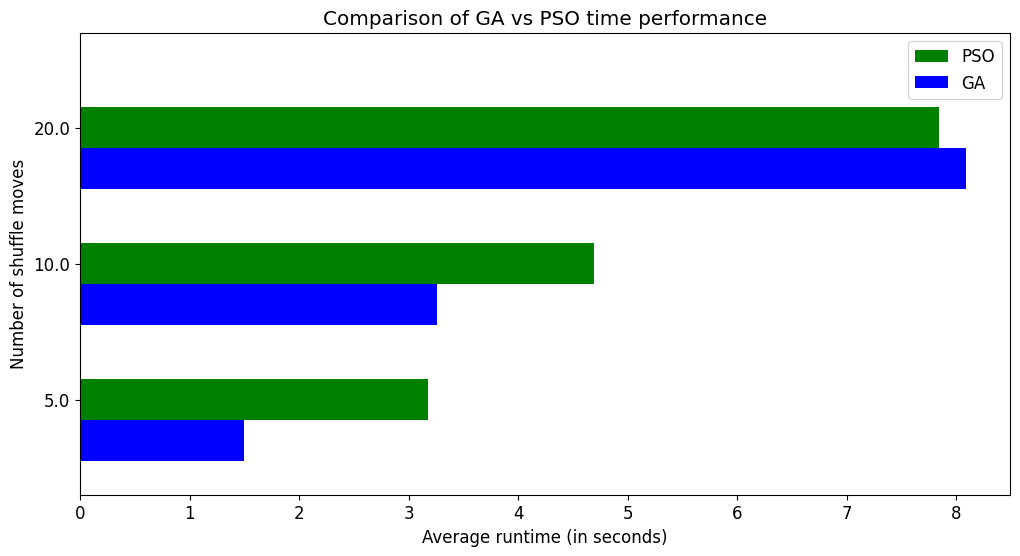

In [245]:
# Plot PSO time vs GA time
fig, ax = plt.subplots(figsize=(12, 6))

y_pos = np.arange(len(results["n_shuffle_moves"]))

width = 0.3

ax.barh(y_pos + width, results_PSO["avg_runtime"], width, color="g", label="PSO")
ax.barh(y_pos, results["avg_runtime"], width, color="b", label="GA")
ax.set_yticks(y_pos, labels=results["n_shuffle_moves"])
ax.set_xlabel('Average runtime (in seconds)')
ax.set_ylabel('Number of shuffle moves')
ax.set_title('Comparison of GA vs PSO time performance')
plt.legend()

ax.set(yticks=y_pos + width, 
       yticklabels=results["n_shuffle_moves"], 
       ylim=[2 * width - 1, len(results)])

plt.show();

# Conclusion

In the experiments above we assumed that length of genes and dimensions that could lead to solving Rubik's cube using GA and PSO should equal to the size of the input. We know that if we make e.g. 10 moves, the Rubik's cube can be solved in **the same number of moves** (but it can surely still be solved with higher number of moves and there is a chance to solve it in less moves)

As we can see above, **GA performed better on medium and small inputs** in terms of run time and percentage of good solutions.

Both experiments were performed on a length of 100 iterations (or generations) with number of particles (or genes) respectively to the size of input (5, 10 and 20).

GA performed good on small and medium inputs, but we can assume that running the algorithm for more generations would improve the overall score.

The same goes to the PSO; improving number of iterations would improve the overall score since **most of the scores in small and medium input range were close to evaluation metric** (which was 1 - all the moves were sufficient to solve the Rubik's cube).

So in conclusion, AG performs better at solving Rubik's cube (according to our hyperparameter choice and size of inputs), but it could benefit more from advanced fitness function, which in our case only checks for right positioning of single cubies.